## Handwritten digits classification with neural networks using TensorFlow and Keras

In this notebook, we classify handwritten digits from the **MNIST dataset** using neural networks.  
We start with a simple model (no hidden layer), then add a hidden layer to improve accuracy,  
and finally use the `Flatten` layer to simplify preprocessing.

In [1]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0].shape

(28, 28)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

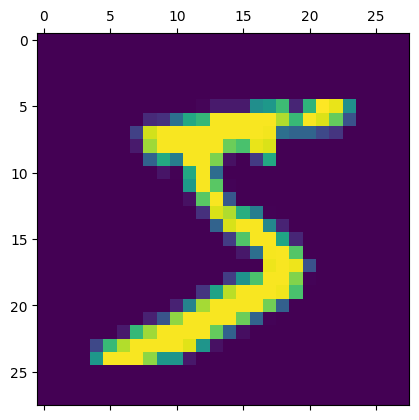

In [7]:
plt.matshow(x_train[0])

In [8]:
x_train = x_train / 255
x_test = x_test / 255

In [9]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
#To flatten the dataset to 1D array
x_train.reshape(len(x_train),28*28)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)
x_train_flattened.shape

(60000, 784)

In [12]:
x_train_flattened[0] # it is now 1D array

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [13]:
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')        #defining input and output layer(784 input layer and 10 output layer)
    ])          
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)                  
model.fit(x_train_flattened, y_train, epochs=5)   


c:\Users\Anish Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8752 - loss: 0.4749
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9148 - loss: 0.3039
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9208 - loss: 0.2832
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9234 - loss: 0.2733
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9252 - loss: 0.2665


In [14]:
model.evaluate(x_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9265 - loss: 0.2665


[0.26649710536003113, 0.9265000224113464]

In [15]:
y_predict = model.predict(x_test_flattened)
y_predict[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([2.0703262e-02, 3.5579725e-07, 6.3664488e-02, 9.6051067e-01,
       2.5273990e-03, 1.2504461e-01, 1.3622110e-06, 9.9976689e-01,
       8.3345577e-02, 6.3115025e-01], dtype=float32)

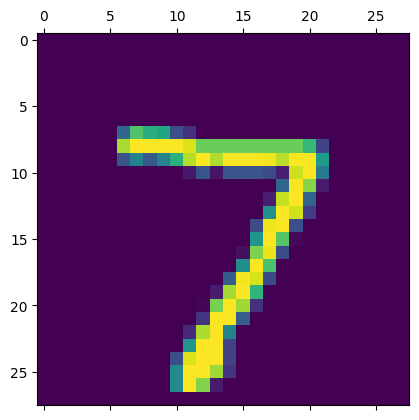

In [16]:
plt.matshow(x_test[0])  # it is same as x_train[0] because both are same images

In [17]:
model.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[2.0703262e-02, 3.5579725e-07, 6.3664488e-02, ..., 9.9976689e-01,
        8.3345577e-02, 6.3115025e-01],
       [3.2333636e-01, 4.2134803e-03, 9.9965489e-01, ..., 1.2439407e-12,
        1.9255832e-01, 3.1636334e-09],
       [4.0958426e-04, 9.9125475e-01, 6.4679992e-01, ..., 1.5921649e-01,
        3.3633190e-01, 5.4774888e-02],
       ...,
       [3.4457507e-06, 2.4109054e-06, 1.5918033e-03, ..., 3.1209129e-01,
        4.9265304e-01, 7.9771936e-01],
       [7.6929027e-05, 8.8409841e-05, 2.1420531e-04, ..., 5.3307598e-05,
        6.2005049e-01, 1.1416755e-04],
       [5.4334747e-03, 2.0947574e-10, 2.2490281e-01, ..., 3.1214089e-08,
        2.3271589e-04, 4.3876256e-07]], dtype=float32)

In [18]:
np.argmax(y_predict[0])  # to convert it into single value the predicted value

np.int64(7)

In [19]:
y_predict_labels = [np.argmax(i) for i in y_predict]  # to convert all the predicted values into single value

In [20]:
y_predict_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [21]:
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 955,    0,    4,    3,    0,    7,    6,    3,    2,    0],
       [   0, 1104,    5,    2,    1,    1,    4,    2,   16,    0],
       [   3,    6,  946,   18,    9,    4,   10,    9,   24,    3],
       [   0,    0,   24,  931,    0,   19,    2,   11,   16,    7],
       [   1,    1,    4,    1,  921,    0,   10,    4,    9,   31],
       [   7,    2,    5,   41,   12,  778,   10,    5,   27,    5],
       [  10,    3,    9,    1,    7,   14,  909,    2,    3,    0],
       [   1,    5,   23,    5,    9,    0,    0,  955,    2,   28],
       [   6,    6,    9,   31,    9,   31,    8,   13,  854,    7],
       [  10,    7,    2,   13,   31,    8,    0,   23,    3,  912]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

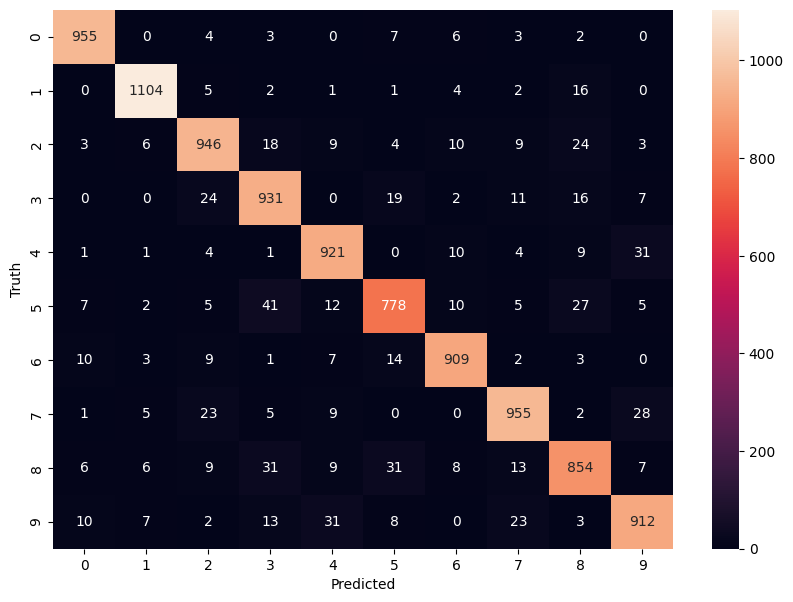

In [22]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Using Hidden Layer**

In [23]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,), activation='relu'),   #hidden layer with 100 neurons  
    keras.layers.Dense(10, activation='sigmoid')     
    ])          
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)                  
model.fit(x_train_flattened, y_train, epochs=5) 

c:\Users\Anish Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9235 - loss: 0.2703
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9638 - loss: 0.1231
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9737 - loss: 0.0864
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9804 - loss: 0.0662
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9838 - loss: 0.0532


In [24]:
model.evaluate(x_test_flattened, y_test)  #97.5% accuracy with hidden layer while 92% without hidden layer

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9751 - loss: 0.0810


[0.08096227049827576, 0.9750999808311462]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

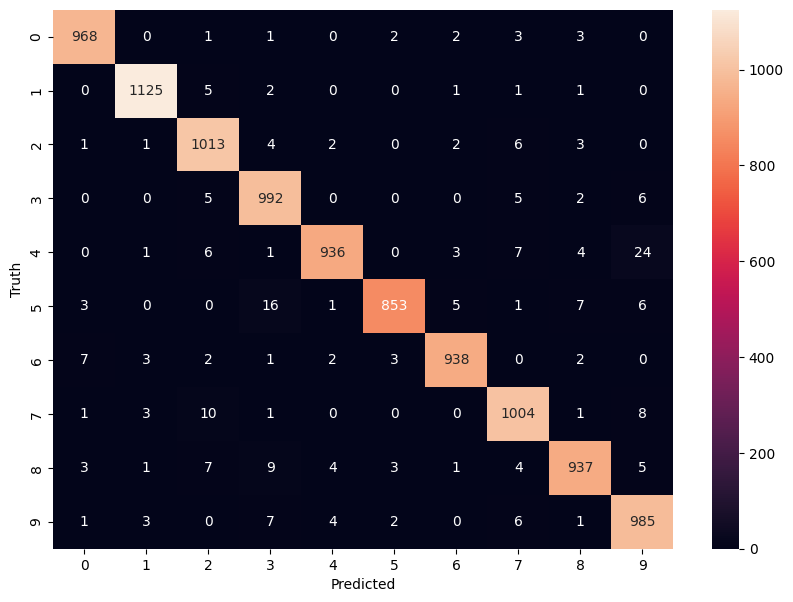

In [25]:
y_predict = model.predict(x_test_flattened)
y_predict_labels = [np.argmax(i) for i in y_predict]  
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_predict_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')    
plt.xlabel('Predicted')
plt.ylabel('Truth')     
 #numbers in diagional are increased and off diagonal are decreased and accuracy is also increased

**Using Flatten Layer So That We Don't Have To Call .reshape On Input Dataset**

In [26]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),  # to flatten the data by itself keras has inbuilt flatten layer
    keras.layers.Dense(100, activation='relu'),   #hidden layer with 100 neurons   
    keras.layers.Dense(10, activation='sigmoid')     
    ])          
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)                  
model.fit(x_train, y_train, epochs=10)   

c:\Users\Anish Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9229 - loss: 0.2704
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9641 - loss: 0.1220
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9744 - loss: 0.0845
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9803 - loss: 0.0634
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9845 - loss: 0.0506
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9873 - loss: 0.0411
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9898 - loss: 0.0325
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9916 - loss: 0.0269
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9932 - loss: 0.0228
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9937 - loss: 0.0195


In [27]:
model.evaluate(x_test, y_test) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9777 - loss: 0.0836


[0.08360626548528671, 0.9776999950408936]

## 🔑 Summary

- A simple neural network (no hidden layer) achieves ~92% accuracy.  
- Adding a hidden layer improves performance to ~97.5%.  
- Using the `Flatten` layer simplifies preprocessing.  

👉 Key takeaway: **hidden layers greatly improve model performance** by learning more complex patterns.
